# Photo-Reverberation Mapping Tutorial

## Imports

In [1]:
import photRM

import os
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

from pyzdcf import pyzdcf

In [2]:
np.random.seed(42)

## Artificial lcs

### Generating

In [3]:
x_band_43, y_band_43, line_response_43 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=43)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 43.00
MBH = 3.14e+06 M_sun
tau_DRW = 17.31 days
sigma_DRW = 0.05 mag^2/day
Time-lag = 9.86 days


In [4]:
art_lc_43 = {'logL': 43, 'M_BH': 3.14e6, 'tau_DRW': 17.31, 'sigma_DRW': 0.05, 'time-lag': 9.86}

In [5]:
x_band_44, y_band_44, line_response_44 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=44)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 44.00
MBH = 1.46e+07 M_sun
tau_DRW = 31.98 days
sigma_DRW = 0.03 mag^2/day
Time-lag = 33.65 days


In [6]:
art_lc_44 = {'logL': 44, 'M_BH': 3.46e7, 'tau_DRW': 31.98, 'sigma_DRW': 0.03, 'time-lag': 33.65}

In [7]:
x_band_45, y_band_45, line_response_45 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=45)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 45.00
MBH = 6.76e+07 M_sun
tau_DRW = 59.10 days
sigma_DRW = 0.01 mag^2/day
Time-lag = 114.82 days


In [8]:
art_lc_45 = {'logL': 45, 'M_BH': 6.76e7, 'tau_DRW': 59.10, 'sigma_DRW': 0.01, 'time-lag': 114.82}

### Saving

In [9]:
x_band_43_cut = x_band_43[:1000]
y_band_43_cut = y_band_43[:1000]
x_band_44_cut = x_band_44[:1000]
y_band_44_cut = y_band_44[:1000]
x_band_45_cut = x_band_45[:1000]
y_band_45_cut = y_band_45[:1000]

In [10]:
'''np.savetxt('x_band_43', np.c_[x_band_43_cut.t, x_band_43_cut.flux, x_band_43_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43', np.c_[y_band_43_cut.t, y_band_43_cut.flux, y_band_43_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('x_band_44', np.c_[x_band_44_cut.t, x_band_44_cut.flux, x_band_44_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_44', np.c_[y_band_44_cut.t, y_band_44_cut.flux, y_band_44_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('x_band_45', np.c_[x_band_45_cut.t, x_band_45_cut.flux, x_band_45_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_45', np.c_[y_band_45_cut.t, y_band_45_cut.flux, y_band_45_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])''';

### Plotting

In [10]:
def plot_artificial_lc(x_band, y_band, line_response, flux_units=None, savefig=False, save_filename=None):
    '''
    Plots the artificial lcs as in the notebook PhotoReverberationMappingAGN.ipynb
    written by I. Jankov et al.
    '''
    fig, (ax1, fig, ax3) = plt.subplots(3,1, sharex=True, figsize=(15,9), tight_layout=True)
    ax1.errorbar(y_band['t'], y_band['flux'], yerr = y_band['err'] ,fmt='ko', markersize=2, alpha=0.6, 
                 capsize=3, label='continuum + line LC (Y-band)')
    fig.errorbar(x_band['t'], x_band['flux'], yerr=x_band['err'], fmt='bo', markersize=2, alpha=0.6,
                 capsize=3, label='continuum LC (X-band)')
    ax3.plot(line_response['t'], line_response['flux'], 'ro-', markersize=2, alpha=0.6, label='line response')

    loc = plticker.MultipleLocator(100)

    for ax in [ax1, fig, ax3]:
        ax.legend(fontsize=13,markerscale=2)

        if flux_units==None:
            ax.set_ylabel('Flux', fontsize=18, labelpad=10)
        else:
            ax.set_ylabel('Flux'+flux_units, fontsize=18, labelpad=10)
        
        ax.tick_params(direction='in', pad=5, labelsize=13)
        ax.set_xlim(0, 1000)
        ax.xaxis.set_major_locator(loc)

    ax3.set_xlabel('Time (days)',fontsize=18,labelpad=10)

    if savefig:
        plt.savefig(save_filename+'.pdf')

    plt.show()

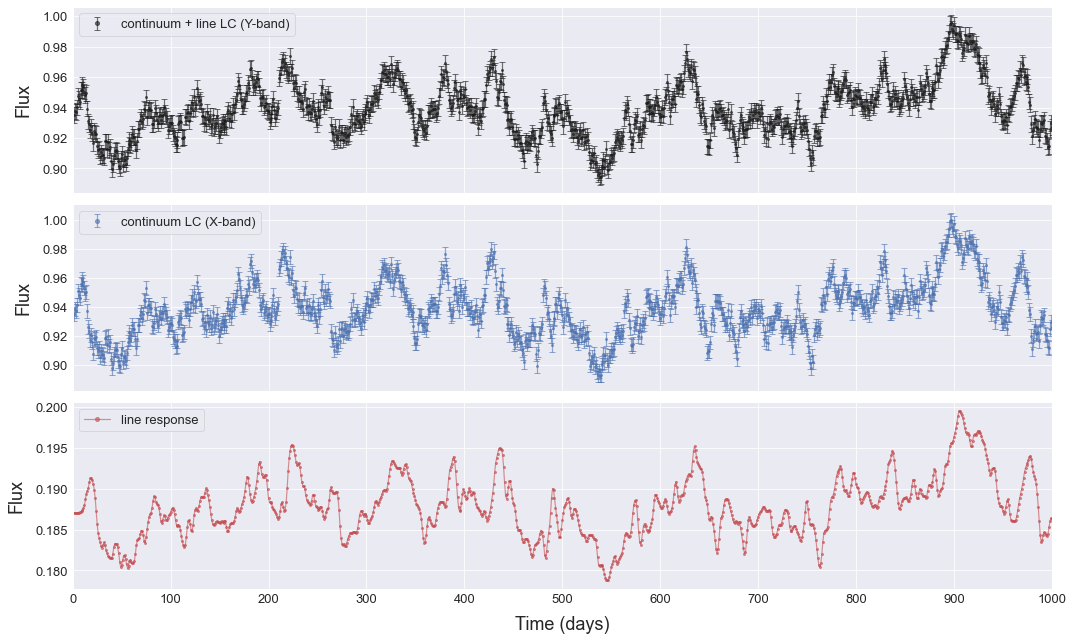

In [11]:
plot_artificial_lc(x_band_43_cut, y_band_43_cut, line_response_43[:1000])  # , 
                   # savefig=True, save_filename='art_lcs_logL43')

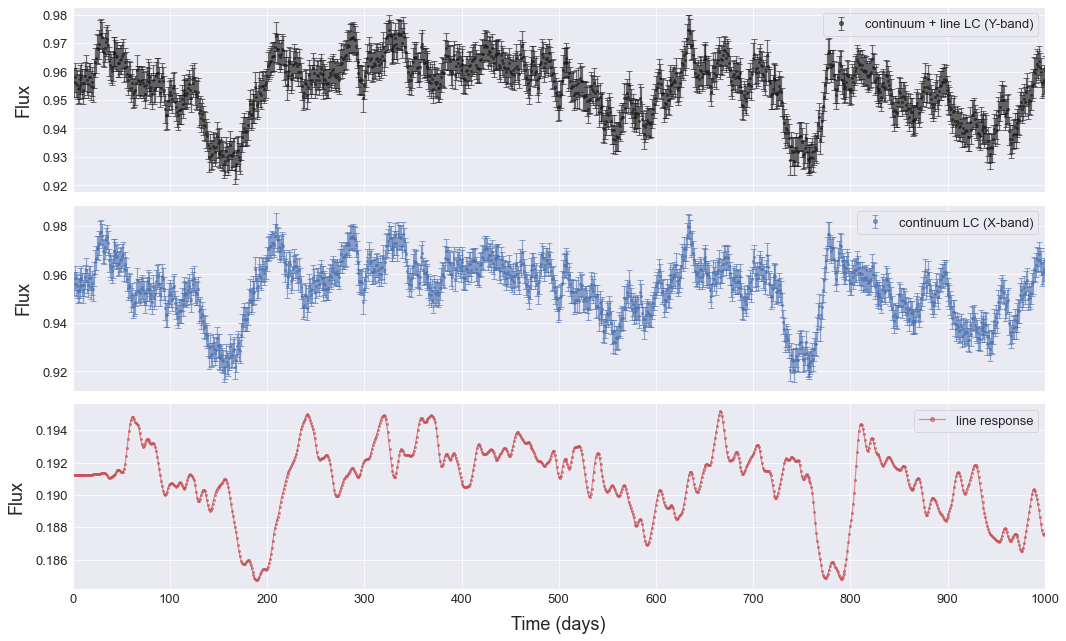

In [12]:
plot_artificial_lc(x_band_44_cut, y_band_44_cut, line_response_44[:1000])  # , 
                   # savefig=True, save_filename='art_lcs_logL44')

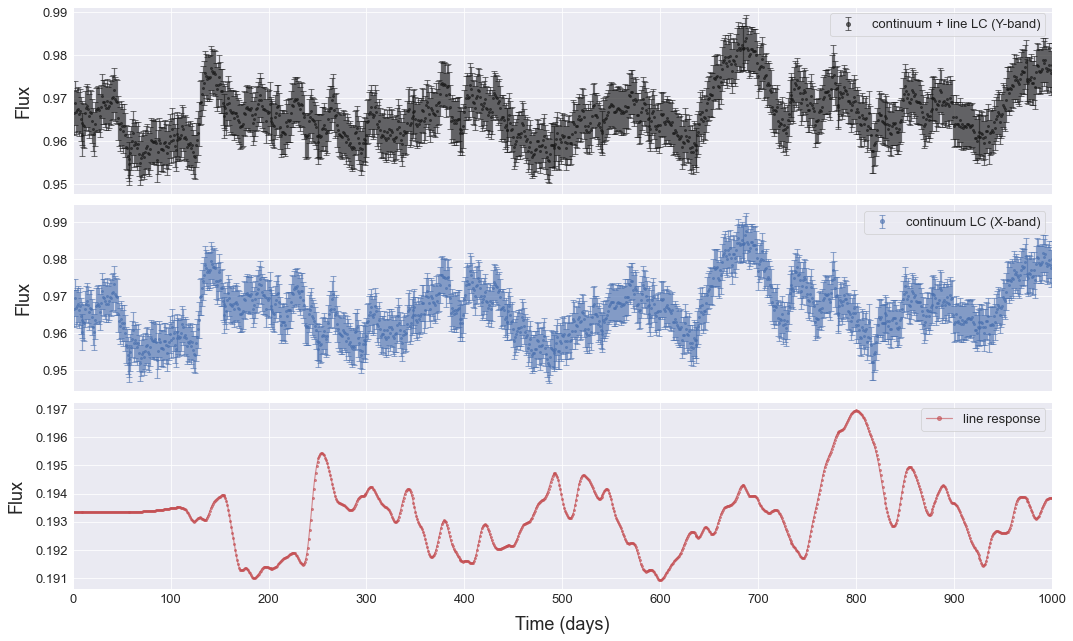

In [13]:
plot_artificial_lc(x_band_45_cut, y_band_45_cut, line_response_45[:1000])  # , 
                   # savefig=True, save_filename='art_lcs_logL45')

### Correlation functions with pyzdcf

In [21]:
input_dir = './artificial_lcs/'
output_dir = './output_dcf_pyzdcf/'

In [23]:
def run_pyzdcf(acf, lc1_filename, uniform, lc2_filename=None):
    
    if acf:
        params = dict(autocf=acf, prefix='AC_'+lc1_filename, 
                      uniform_sampling=uniform, omit_zero_lags=True, 
                      minpts=0, num_MC=100, lc1_name=lc1_filename)
    else:
        params = dict(autocf=acf, prefix='CC_'+lc1_filename+lc2_filename, 
                      uniform_sampling=uniform, omit_zero_lags=True, 
                      minpts=0, num_MC=100, lc1_name=lc1_filename, lc2_name=lc2_filename)
    
    result = pyzdcf(input_dir, output_dir, intr=False, parameters=params, sep=' ', sparse='auto')

    return result

#### ACF

In [24]:
x_band_43_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_43', uniform=True)
x_band_44_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_44', uniform=True)
x_band_45_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_45', uniform=True)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

989 bins actually used, 55.0 inter-dependent pairs discarded.


AC_x_band_43.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

989 bins actually used, 55.0 inter-dependent pairs discarded.


AC_x_band_44.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

989 bins actually used, 55.0 inter-depen

#### CCF

In [25]:
x_y_bands_43_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_43', lc2_filename='y_band_43', uniform=True)
x_y_bands_44_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_44', lc2_filename='y_band_44', uniform=True)
x_y_bands_45_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_45', lc2_filename='y_band_45', uniform=True)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 500050 inter-dependent pairs discarded.


CC_x_band_43y_band_43.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 500050 inter-dependent pairs discarded.


CC_x_band_44y_band_44.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actual

### Plot

In [18]:
def plot_acf_ccf(acf, ccf, save=False, save_filename=None, save_path=None):

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    ax.plot(ccf['tau'], ccf['dcf'],'s--', c='darkviolet', label='CCF', markersize=4)
    ax.plot(acf['tau'], acf['dcf'],'o--', c='darkorange', label='ACF', markersize=4)

    ax.set_xlim(-120, 120)
    ax.set_ylim(-0.25, 1.1)

    ax.set_xlabel("Time (days)", fontsize=15, labelpad=7)
    ax.set_ylabel("Correlation (arbit. units)", fontsize=15, labelpad=7)
    ax.legend(fontsize=14)
    
    loc = plticker.MultipleLocator(25)
    ax.xaxis.set_major_locator(loc)
    ax.tick_params(direction='in', pad = 5,labelsize=13)
    
    # ax.set_title('CCF and ACF using pyZDCF',fontsize=15)
    
    ax.grid(which='major',axis='x',linestyle='--')

    if save:
        plt.savefig(save_path+save_filename+'.pdf')

    plt.show()

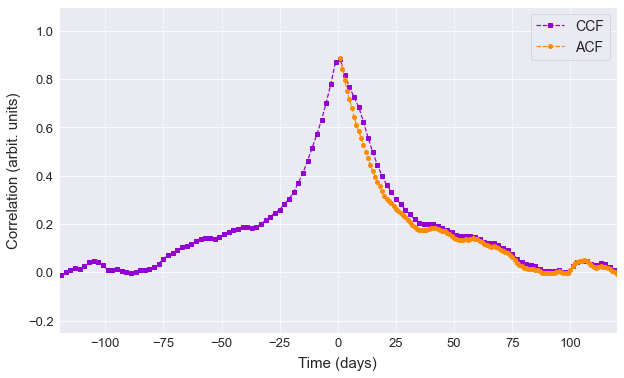

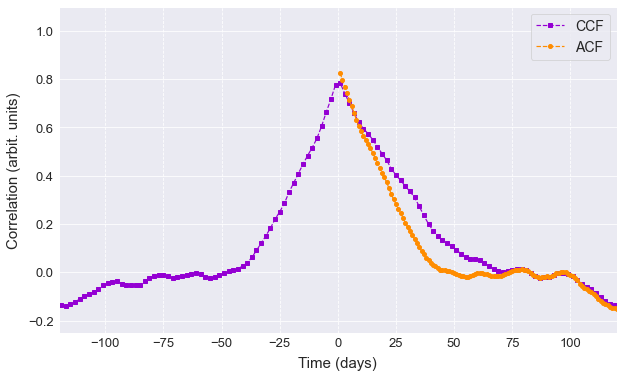

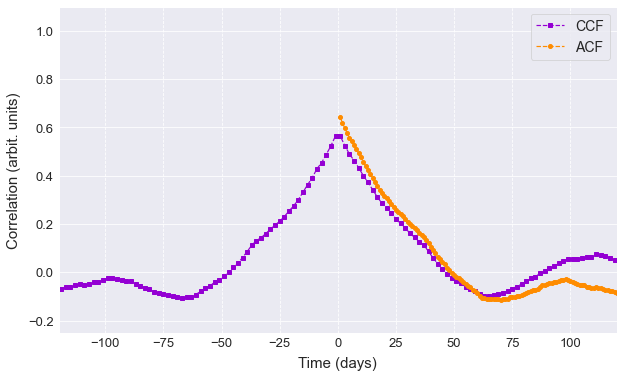

In [19]:
plot_acf_ccf(x_band_43_ACF, x_y_bands_43_CCF, save=True, save_filename='art_x_y_bands_43_pyzdcf', save_path='./CCF_plots/')
plot_acf_ccf(x_band_44_ACF, x_y_bands_44_CCF, save=True, save_filename='art_x_y_bands_44_pyzdcf', save_path='./CCF_plots/')
plot_acf_ccf(x_band_45_ACF, x_y_bands_45_CCF, save=True, save_filename='art_x_y_bands_45_pyzdcf', save_path='./CCF_plots/')

### CCF - ACF

In [3]:
dcf_files = './output_dcf_pyzdcf/'

In [4]:
def run_plike(object_name, lc1_name, lc2_name=None, lag_lowlimit=-700, lag_uplimit=700):
    
    name = object_name+'_'+lc1_name+'_'+lc2_name
    print('########## computing PLIKE for source ' + object_name + ' at ' + lc1_name + ' and ' + lc2_name)
    
    #running plike (v4.0)
    plike_path = '/Users/nicolasgalvarinoguerravaras/Documents/ESO_Summer_Research_Programme/Code+Data/ZDCF/plike.exe'
    cmd3 = plike_path+' << EOF \n'+name+'.dcf \n'+str(lag_lowlimit)+' \n'+str(lag_uplimit)+' \n EOF'
    os.system(cmd3)

    try:
        # loading plike results
        aux = np.genfromtxt('CC_'+name+'.dcf.plike.out')
        lag_peak = aux[0]
        lag_lowerr = aux[1]
        lag_uperr = aux[2]

        # loading zdcf results to obtain r in the peak
        aux2 = np.loadtxt('CC_'+name+'.dcf', dtype='str').transpose()
        lags = aux2[0].astype(np.float)
        rs = aux2[3].astype(np.float)

        r_peak = rs[np.where(lags==lag_peak)][0]

    except:
        print('problems computing peak from PLIKE for source ' + object_name + ' at ' + lc1_name + ' and ' + lc2_name)
        lag_peak = -8888
        lag_lowerr = -8888
        lag_uperr = -8888
        lags = -8888
        rs = -8888
        r_peak = -8888

    # deleting plike.out
    cmd = 'rm '+name+'.dcf.plike.out'
    os.system(cmd)

    return (object_name, lc1_name, lc2_name, lag_peak, lag_lowerr, lag_uperr, r_peak)

In [29]:
def final_CCF(acf, ccf):
    
    acf_inverted = photRM.add_inverted_acf(acf)
    acf_interpol = photRM.interp(ccf, acf_inverted)

    final_ccf = photRM.delta_ccf(acf_interpol, ccf)

    return final_ccf

In [30]:
x_y_bands_43_final = final_CCF(x_band_43_ACF, x_y_bands_43_CCF)
x_y_bands_44_final = final_CCF(x_band_44_ACF, x_y_bands_44_CCF)
x_y_bands_45_final = final_CCF(x_band_45_ACF, x_y_bands_45_CCF)

In [55]:
x_y_bands_43_final.to_csv('art_x_y_bands_43_final.dcf', index=False, header=False, sep=' ')
x_y_bands_44_final.to_csv('art_x_y_bands_44_final.dcf', index=False, header=False, sep=' ')
x_y_bands_45_final.to_csv('art_x_y_bands_45_final.dcf', index=False, header=False, sep=' ')

In [7]:
results = []

results.append(run_plike('art', 'x_y_bands_43', lc2_name='final', lag_lowlimit=-200, lag_uplimit=200))
results.append(run_plike('art', 'x_y_bands_44', lc2_name='final', lag_lowlimit=-200, lag_uplimit=200))
results.append(run_plike('art', 'x_y_bands_45', lc2_name='final', lag_lowlimit=-200, lag_uplimit=200))

head = 'object_name', 'lc_1', 'lc_2', 'lag_peak', 'lag_lowerr', 'lag_uperr', 'r_peak'

art_lcs_zdcf_plike_df = pd.DataFrame(results, columns=head)

out_file_name = './output_PLIKE/PLIKE_output_art_lcs.csv'

art_lcs_zdcf_plike_df.to_csv(out_file_name)

print("File %s writen" % (out_file_name))
print(results)

########## computing PLIKE for source art at x_y_bands_43 and final
PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag = -2.000E+02 to  2.000E+02

 200 data points found in time-lag range

ZDCF peak at  +9.000E+00 r_max =  +9.972E-02 ZDCF C.O.M. at  +1.273E+01

Progress meter: ........................................................................................................................................................................................................

Results:

  9.000E+00    2.267E+00    6.188E+00

Output written on plike.out.
Program ended.
problems computing peak from PLIKE for source art at x_y_bands_43 and final
########## computing PLIKE for source art at x_y_bands_44 and final
PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag = -2.000E+02 to  2.000E+02

 200 data points fou

In [23]:
'''def peak_and_plot(final_ccf, acf, ccf, save_plot, filename, ylim_ax2=(-0.25,1.25)):

    tau, peaks_x, peaks_y = photRM.peak_finder(final_ccf.dcf.values, final_ccf.tau.values, (-100, 200))

    err_low = final_ccf.loc[final_ccf.tau == tau, '-sig(tau)'].values[0]
    err_high = final_ccf.loc[final_ccf.tau == tau, '+sig(tau)'].values[0]

    lims_x = (tau-70, tau+70)
    lims_y = (-0.5, 1)
    err = (err_low*(-1), err_high)

    photRM.plot_ccf_acf(final_ccf, ccf, acf, locator=10, peak=True, tau=tau, 
                        err=err, lims_x=lims_x, lims_y=lims_y, save=save_plot, save_filename=filename, 
                        lims_y_ax2=ylim_ax2)'''

Peak candidates (x-axis vals):  [  9.  51.  71.  79. 113. 123. 151. 171. 179. 195.]
Max. peak:  9.0


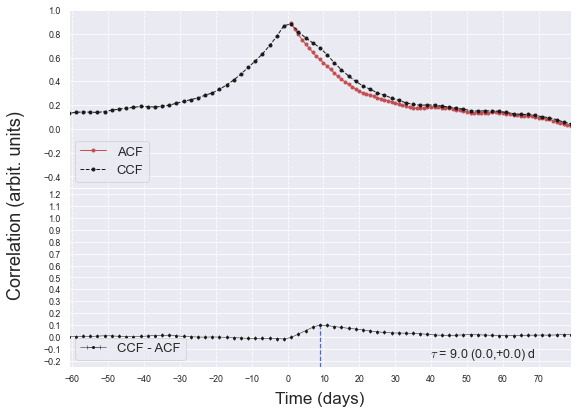

Peak candidates (x-axis vals):  [ 33.  93. 113. 127.]
Max. peak:  33.0


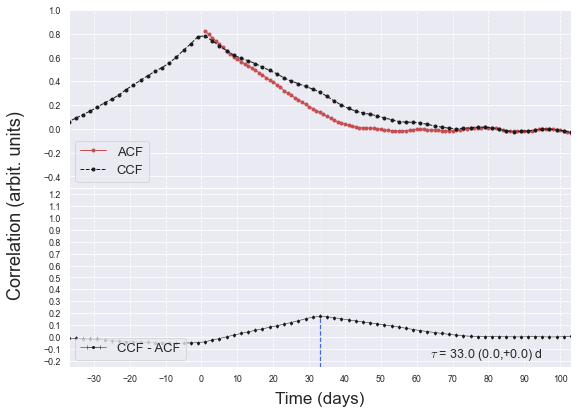

Peak candidates (x-axis vals):  [115. 189.]
Max. peak:  115.0


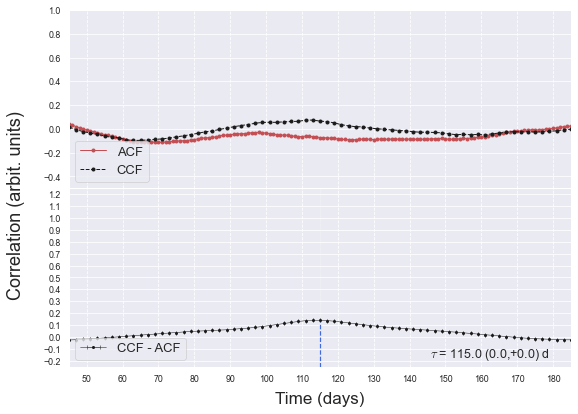

In [24]:
'''peak_and_plot(x_y_bands_43_final, x_band_43_ACF, x_y_bands_43_CCF, save_plot=True, filename='x_y_bands_43_final')
peak_and_plot(x_y_bands_44_final, x_band_44_ACF, x_y_bands_44_CCF, save_plot=True, filename='x_y_bands_44_final')
peak_and_plot(x_y_bands_45_final, x_band_45_ACF, x_y_bands_45_CCF, save_plot=True, filename='x_y_bands_45_final')'''

### Introducing Gaps

#### One every 5 days

In [25]:
x_band_43_5days = pd.DataFrame(columns=['t', 'flux', 'err'])
x_band_43_5days

,t,flux,err


In [26]:
y_band_43_5days = pd.DataFrame(columns=['t', 'flux', 'err'])
y_band_43_5days

,t,flux,err


In [27]:
counter = 1

while x_band_43_5days.shape[0] < 1000:
    x_band_43_5days = x_band_43_5days.append(x_band_43.loc[x_band_43.t == counter])
    y_band_43_5days = y_band_43_5days.append(y_band_43.loc[y_band_43.t == counter])
    counter += 5

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/2360899619.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_5days = x_band_43_5days.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/2360899619.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_5days = y_band_43_5days.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/2360899619.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_5days = x_band_43_5days.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/2360899619.py:5: FutureWarning: The frame.ap

In [28]:
x_band_43_5days

,t,flux,err
0,1,0.935300,0.004836
5,6,0.948404,0.004869
10,11,0.957285,0.004892
15,16,0.926035,0.004812
20,21,0.907615,0.004763
...,...,...,...
4975,4976,0.929371,0.004820
4980,4981,0.921326,0.004799
4985,4986,0.929081,0.004819
4990,4991,0.955579,0.004888


In [29]:
y_band_43_5days

,t,flux,err
0,1,0.935300,0.005141
5,6,0.945801,0.005170
10,11,0.953407,0.005191
15,16,0.930952,0.005129
20,21,0.916619,0.005090
...,...,...,...
4975,4976,0.932311,0.005133
4980,4981,0.928451,0.005123
4985,4986,0.928847,0.005124
4990,4991,0.948540,0.005178


In [30]:
'''np.savetxt('x_band_43_5days', np.c_[x_band_43_5days.t, x_band_43_5days.flux, x_band_43_5days.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43_5days', np.c_[y_band_43_5days.t, y_band_43_5days.flux, y_band_43_5days.err], 
           fmt=['%.1f','%.7e','%.7e'])'''

"np.savetxt('x_band_43_5days', np.c_[x_band_43_5days.t, x_band_43_5days.flux, x_band_43_5days.err], \n           fmt=['%.1f','%.7e','%.7e'])\nnp.savetxt('y_band_43_5days', np.c_[y_band_43_5days.t, y_band_43_5days.flux, y_band_43_5days.err], \n           fmt=['%.1f','%.7e','%.7e'])"

In [31]:
x_5days_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_43_5days', uniform=True)
x_y_5days_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_43_5days', lc2_filename='y_band_43_5days', uniform=True)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

989 bins actually used, 55.0 inter-dependent pairs discarded.


acf_x_band_43_5days.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  True
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 500050 inter-dependent pairs discarded.


ccf_x_band_43_5daysy_band_43_5days.dcf written...

pyZDCF ended.



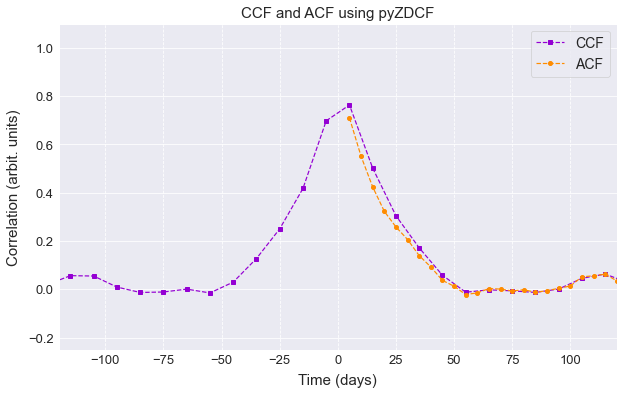

In [32]:
plot_acf_ccf(x_5days_ACF, x_y_5days_CCF, save=True, save_filename='artificial_x_y_5days', save_path='./CCF_plots/')

In [33]:
x_y_5days_final = final_CCF(x_5days_ACF, x_y_5days_CCF)

Locator attempting to generate 1089 ticks ([-5440.0, ..., 5440.0]), which exceeds Locator.MAXTICKS (1000).


Peak candidates (x-axis vals):  [ 15.  75. 125. 165. 185.]
Max. peak:  15.0


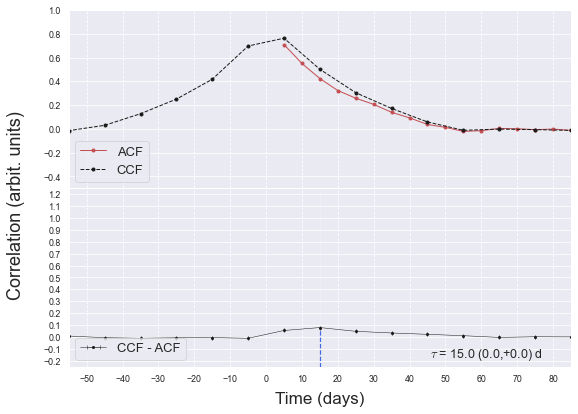

In [34]:
peak_and_plot(x_y_5days_final, x_5days_ACF, x_y_5days_CCF, save_plot=True, filename='artificial_x_y_5days')

#### Month on and off

In [35]:
x_band_43_month = pd.DataFrame(columns=['t', 'flux', 'err'])
x_band_43_month

,t,flux,err


In [36]:
y_band_43_month = pd.DataFrame(columns=['t', 'flux', 'err'])
y_band_43_month

,t,flux,err


In [37]:
counter = 1

while x_band_43_month.shape[0] < 1000:
    x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
    y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
    
    if counter % 30 == 0:
        counter += 31
    else:
        counter += 1

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/1718549071.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/1718549071.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/1718549071.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/1718549071.py:5: FutureWarning: The frame.ap

In [38]:
x_band_43_month

,t,flux,err
0,1,0.935300,0.004836
1,2,0.938463,0.004844
2,3,0.937414,0.004841
3,4,0.941332,0.004851
4,5,0.950695,0.004875
...,...,...,...
1985,1986,0.945654,0.004862
1986,1987,0.948589,0.004870
1987,1988,0.952629,0.004880
1988,1989,0.955326,0.004887


In [39]:
y_band_43_month

,t,flux,err
0,1,0.935300,0.005141
1,2,0.937831,0.005148
2,3,0.936992,0.005146
3,4,0.940129,0.005155
4,5,0.947624,0.005175
...,...,...,...
1985,1986,0.946463,0.005172
1986,1987,0.949340,0.005180
1987,1988,0.952900,0.005190
1988,1989,0.954880,0.005195


In [40]:
'''np.savetxt('x_band_43_month', np.c_[x_band_43_month.t, x_band_43_month.flux, x_band_43_month.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43_month', np.c_[y_band_43_month.t, y_band_43_month.flux, y_band_43_month.err], 
           fmt=['%.1f','%.7e','%.7e'])'''

"np.savetxt('x_band_43_month', np.c_[x_band_43_month.t, x_band_43_month.flux, x_band_43_month.err], \n           fmt=['%.1f','%.7e','%.7e'])\nnp.savetxt('y_band_43_month', np.c_[y_band_43_month.t, y_band_43_month.flux, y_band_43_month.err], \n           fmt=['%.1f','%.7e','%.7e'])"

In [41]:
x_month_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_43_month', uniform=False)
x_y_month_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_43_month', lc2_filename='y_band_43_month', uniform=False)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

952 bins actually used, 249773.0 inter-dependent pairs discarded.


acf_x_band_43_month.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

340 bins actually used, 894434 inter-dependent pairs discarded.


ccf_x_band_43_monthy_band_43_month.dcf written...

pyZDCF ended.



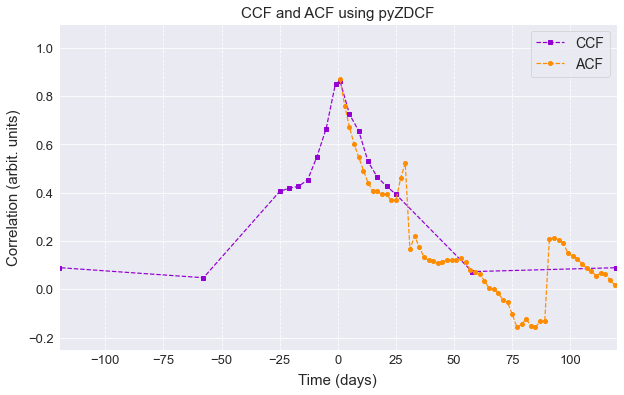

In [42]:
plot_acf_ccf(x_month_ACF, x_y_month_CCF, save=True, save_filename='artificial_x_y_month', save_path='./CCF_plots/')

In [43]:
x_y_month_final = final_CCF(x_month_ACF, x_y_month_CCF)

Peak candidates (x-axis vals):  [  9.         119.78723404 185.        ]
Max. peak:  9.0


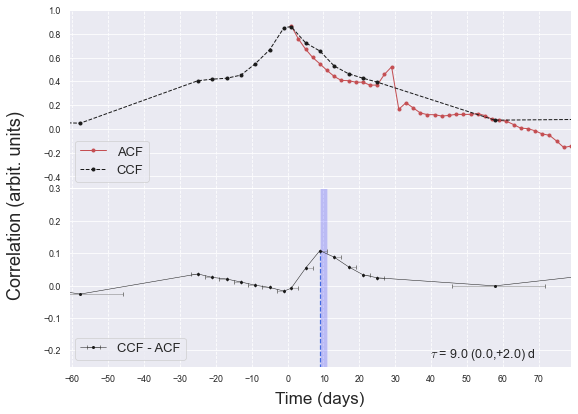

In [55]:
peak_and_plot(x_y_month_final, x_month_ACF, x_y_month_CCF, save_plot=True, filename='artificial_x_y_month', ylim_ax2=(-0.25, 0.3))

#### Months by 3 and 6

three month of observations every day

followed by six months of observations with a frequency of once per month

then a gap of three months

In [45]:
x_band_43_lgaps = pd.DataFrame(columns=['t', 'flux', 'err'])
x_band_43_lgaps  # lgaps for long gaps

,t,flux,err


In [46]:
y_band_43_lgaps = pd.DataFrame(columns=['t', 'flux', 'err'])
y_band_43_lgaps

,t,flux,err


In [47]:
counter = 1

while x_band_43_lgaps.shape[0] < 1000:
    x_band_43_lgaps = x_band_43_lgaps.append(x_band_43.loc[x_band_43.t == counter])
    y_band_43_lgaps = y_band_43_lgaps.append(y_band_43.loc[y_band_43.t == counter])
    
    if counter % 90 == 0:  # after three months
        counter += 31  # frequency of once per month
    elif counter % 180 == 0:  # after six months
        counter += 91
    else:
        counter += 1

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/4058620464.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_lgaps = x_band_43_lgaps.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/4058620464.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_lgaps = y_band_43_lgaps.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/4058620464.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_lgaps = x_band_43_lgaps.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_15248/4058620464.py:5: FutureWarning: The frame.ap

In [48]:
x_band_43_lgaps

,t,flux,err
0,1,0.935300,0.004836
1,2,0.938463,0.004844
2,3,0.937414,0.004841
3,4,0.941332,0.004851
4,5,0.950695,0.004875
...,...,...,...
1475,1476,0.952723,0.004880
1476,1477,0.956148,0.004889
1477,1478,0.954425,0.004885
1478,1479,0.956106,0.004889


In [49]:
y_band_43_lgaps

,t,flux,err
0,1,0.935300,0.005141
1,2,0.937831,0.005148
2,3,0.936992,0.005146
3,4,0.940129,0.005155
4,5,0.947624,0.005175
...,...,...,...
1475,1476,0.954527,0.005194
1476,1477,0.957877,0.005203
1477,1478,0.956537,0.005199
1478,1479,0.957550,0.005202


In [50]:
'''np.savetxt('x_band_43_lgaps', np.c_[x_band_43_lgaps.t, x_band_43_lgaps.flux, x_band_43_lgaps.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43_lgaps', np.c_[y_band_43_lgaps.t, y_band_43_lgaps.flux, y_band_43_lgaps.err], 
           fmt=['%.1f','%.7e','%.7e'])'''

"np.savetxt('x_band_43_lgaps', np.c_[x_band_43_lgaps.t, x_band_43_lgaps.flux, x_band_43_lgaps.err], \n           fmt=['%.1f','%.7e','%.7e'])\nnp.savetxt('y_band_43_lgaps', np.c_[y_band_43_lgaps.t, y_band_43_lgaps.flux, y_band_43_lgaps.err], \n           fmt=['%.1f','%.7e','%.7e'])"

In [51]:
x_lgaps_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_43_lgaps', uniform=False)
x_y_lgaps_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_43_lgaps', lc2_filename='y_band_43_lgaps', uniform=False)


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

721 bins actually used, 249665.0 inter-dependent pairs discarded.


acf_x_band_43_lgaps.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

350 bins actually used, 867766 inter-dependent pairs discarded.


ccf_x_band_43_lgapsy_band_43_lgaps.dcf written...

pyZDCF ended.



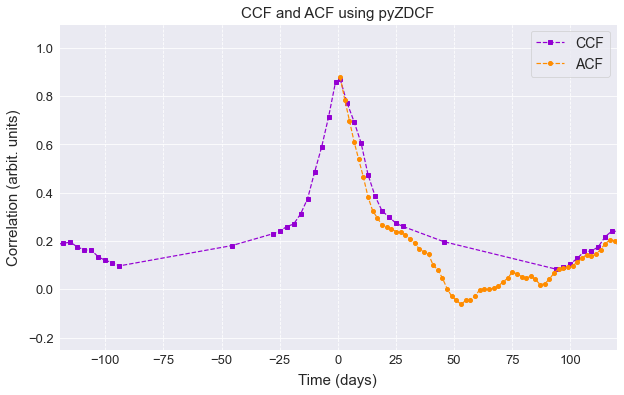

In [52]:
plot_acf_ccf(x_lgaps_ACF, x_y_lgaps_CCF, save=True, save_filename='artificial_x_y_lgaps', save_path='./CCF_plots/')

Peak candidates (x-axis vals):  [ 10.          45.48916409 135.42244224 187.        ]
Max. peak:  135.4224422442244


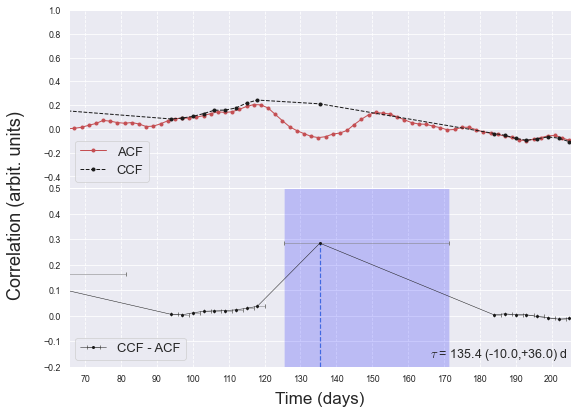

In [53]:
x_y_lgaps_final = final_CCF(x_lgaps_ACF, x_y_lgaps_CCF)
peak_and_plot(x_y_lgaps_final, x_lgaps_ACF, x_y_lgaps_CCF, save_plot=True, filename='artificial_x_y_lgaps', 
              ylim_ax2=(-0.2, 0.5))

## NGC 4395

In [56]:
sdss_lcs = pd.read_csv('NGC4395_data/SDSS_lcs.csv')
sdss_lcs

,filter,JD,mag,e_mag
0,i,2.455616e+06,16.878,0.048
1,i,2.455616e+06,16.928,0.035
2,i,2.455616e+06,16.844,0.042
3,i,2.455616e+06,16.879,0.030
4,i,2.455616e+06,16.863,0.024
...,...,...,...,...
818,g,2.455627e+06,17.336,0.022
819,g,2.455627e+06,17.342,0.020
820,g,2.455627e+06,17.325,0.023
821,g,2.455627e+06,17.298,0.023


In [61]:
sdss_lcs.JD[0]

2455616.28833

In [ ]:
t0 = 2455616.3103



In [57]:
Counter(sdss_lcs['filter'])

Counter({'i': 271, 'r': 282, 'g': 270})

In [58]:
sdss_i = sdss_lcs.loc[sdss_lcs['filter']=='i']
sdss_r = sdss_lcs.loc[sdss_lcs['filter']=='r']
sdss_g = sdss_lcs.loc[sdss_lcs['filter']=='g']

### Plotting lcs

KeyError: 't'

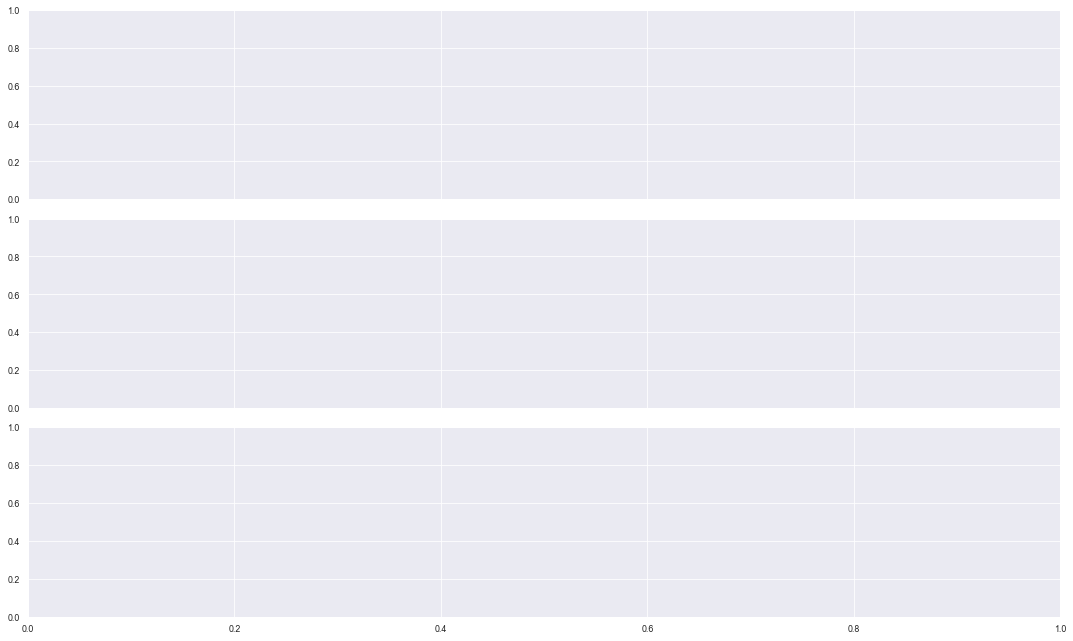

In [59]:
plot_artificial_lc(sdss_i, sdss_r, sdss_g)

### Computing ACF & CCF

In [ ]:
x_lgaps_ACF = run_pyzdcf(acf=True, lc1_filename='x_band_43_lgaps', uniform=False)
x_y_lgaps_CCF = run_pyzdcf(acf=False, lc1_filename='x_band_43_lgaps', lc2_filename='y_band_43_lgaps', uniform=False)